# <div align="center">Anomaly Detection using Auto Encoder</div>

- Anomaly detection is a machine learning method used to find data patterns that deviate from normal behavior. These anomalies, or outliers, may signal errors, fraud, or unusual events requiring further analysis. It is widely applied in fields like finance, cybersecurity, healthcare, and maintenance, using techniques such as statistical models, clustering, and deep learning.
- Popular anomaly detection methods include PCA, K-Nearest Neighbors, Isolation Forest, and ensemble techniques. In deep learning, Autoencoders are widely used by learning normal data patterns and detecting deviations as anomalies. Evaluating such models is difficult due to the rarity of anomalies, so metrics like precision, recall, and F1-score, along with cross-validation, are used to assess performance.
- `Why not PCA`: PCA is a dimensionality reduction technique that identifies directions of maximum variance and can aid in anomaly detection by simplifying high-dimensional data. However, it assumes linear relationships and may fail on nonlinear or complex datasets. It is also less effective at detecting rare anomalies when normal patterns dominate the data.
- `Autoencoders` are a type of neural network architecture that can be used for unsupervised learning, dimensionality reduction, and data compression. The goal of an autoencoder is to learn a compressed representation of the input data by encoding the input into a lower-dimensional representation, and then decoding the representation back into the original input.
- Autoencoders have three parts: an encoder that compresses input into a lower-dimensional representation, a hidden layer (Code) that stores this representation, and a decoder that reconstructs the original data from it.
- Autoencoders learn to reduce the difference between input and reconstructed output, creating a compressed data representation. They capture complex, non-linear patterns and are useful for tasks like image compression, anomaly detection, and data generation.
- In anomaly detection, autoencoders are trained on normal data to learn its typical patterns. New data is encoded and reconstructed, and if the reconstruction error exceeds a set threshold, it is flagged as an anomaly. This approach works without needing labeled anomalies in the training set.
![Image](screenshots/anomaly.png)

- Auto Encoder: `Architecture Overview`
  - The encoder typically consists of one or more fully connected layers that transform the input data into a lower-dimensional representation. The number of nodes in the hidden layer is typically smaller than the number of nodes in the input and output layers, which forces the network to learn a compressed representation of the input data. The activation function used in the encoder can be any non-linear function, such as a sigmoid or a rectified linear unit (ReLU), which allows the network to capture non-linear relationships in the input data.
  - The decoder is typically a mirror image of the encoder, with one or more fully connected layers that transform the compressed representation back into the original input space. The output layer of the decoder should have the same number of nodes as the input layer, so that the decoder can produce a reconstruction of the input data. The activation function used in the decoder is typically the same as the one used in the encoder.
- Auto Encoder can be used for
  - Feature Detection
  - Encoding the features
- Hidden Layers: If we have hidden nodes greater than or equal to input node then info can propagate from input to output and hidden layer. To solve it we can different approaches.
- Stacked AutoEncoder: It has 2 encoding layer and 1 decoding layer.

### Traning a Auto Encoder
- Steps performed:
  - Step 1: We start with an array where the lines (the observations) correspond to the users and the columns (the features) correspond to the movies. Each cell (u, i) contains the rating (from 1 to 5, 0 if no rating) of the movie i by the user u.
  - Step 2: The first user goes into the network. The input vector x = (r₁, r₂, ..., rₘ) contains all its ratings for all the movies.
  - Step 3: The input vector x is encoded into a vector z of lower dimensions by a mapping function f (e.g., sigmoid function): z = f(Wx+b)z, where W is the vector of input weights and b is the bias.
  - Step 4: z is then decoded into the output vector y of same dimensions as x, aiming to replicate the input vector x.
  - Step 5: The reconstruction error d(x,y) = ∣∣x−y∣∣ is computed. The goal is to minimize it.
  - Step 6: Back-Propagation: From right to left, the error is back-propagated. The weights are updated according to how much they are responsible for the error. The learning rate decides by how much we update the weights.
  - Step 7: Repeat Steps 1 to 6 and update the weights after each observation (Reinforcement Learning) Or Repeat Steps 1 to 6 but update the weights only after a batch of observations (Batch Learning).
  - Step 8: When the whole training set has passed through the ANN, that makes an epoch. Redo more epochs.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

## Importing the dataset

In [3]:
df = pd.read_csv('data/card_transdata.csv', header = 0)
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### Data Analysis and Data Cleaning

In [4]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
# Shape of Dataset
rows = df.shape[0]
columns = df.shape[1]
print(f"Rows: {rows}, Columns: {columns}")

Rows: 1000000, Columns: 8


In [6]:
# Checking for Null Values
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
# Basic Statistics
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Used to quickly identify categorical or binary columns for further analysis, preprocessing (like encoding), or feature selection.
cat_feats = [x for x in df.columns if len(df[x].unique()) <=2] # Checks if the column has 2 or less unique values
num_feats = [x for x in df.columns if x not in cat_feats]
print(f"cat_feats: {cat_feats}, num_feats: {num_feats}")

cat_feats: ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud'], num_feats: ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']


In [11]:
df['fraud'].unique()

array([0., 1.])

### Exploratory Data Analysis (EDA)

In [12]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

##### Inferences
- The dataset is heavily **imbalanced**
- The autoencoders only require instances of `genuine` samples for training
- The `fraud` samples will be used for testing

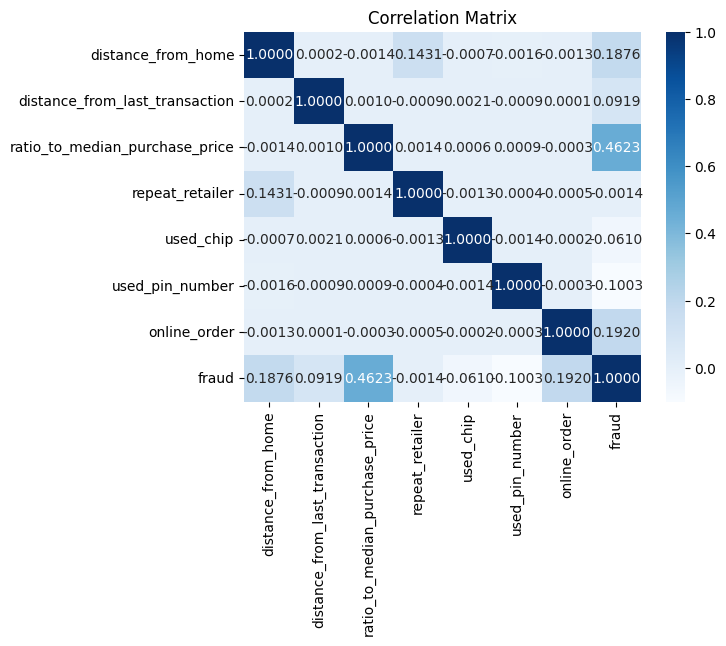

In [13]:
sns.heatmap(df.corr(), annot=True, fmt='.4f', cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

##### Inferences
* Most correlation values are very close to 0, which indicates that our features are **weakly correlated**
* PCA assumes linearity in the data, and it does not work well with Non-linear features
* This is where **Autoencoders** prove to be useful, since they can capture the complex relationships in the data

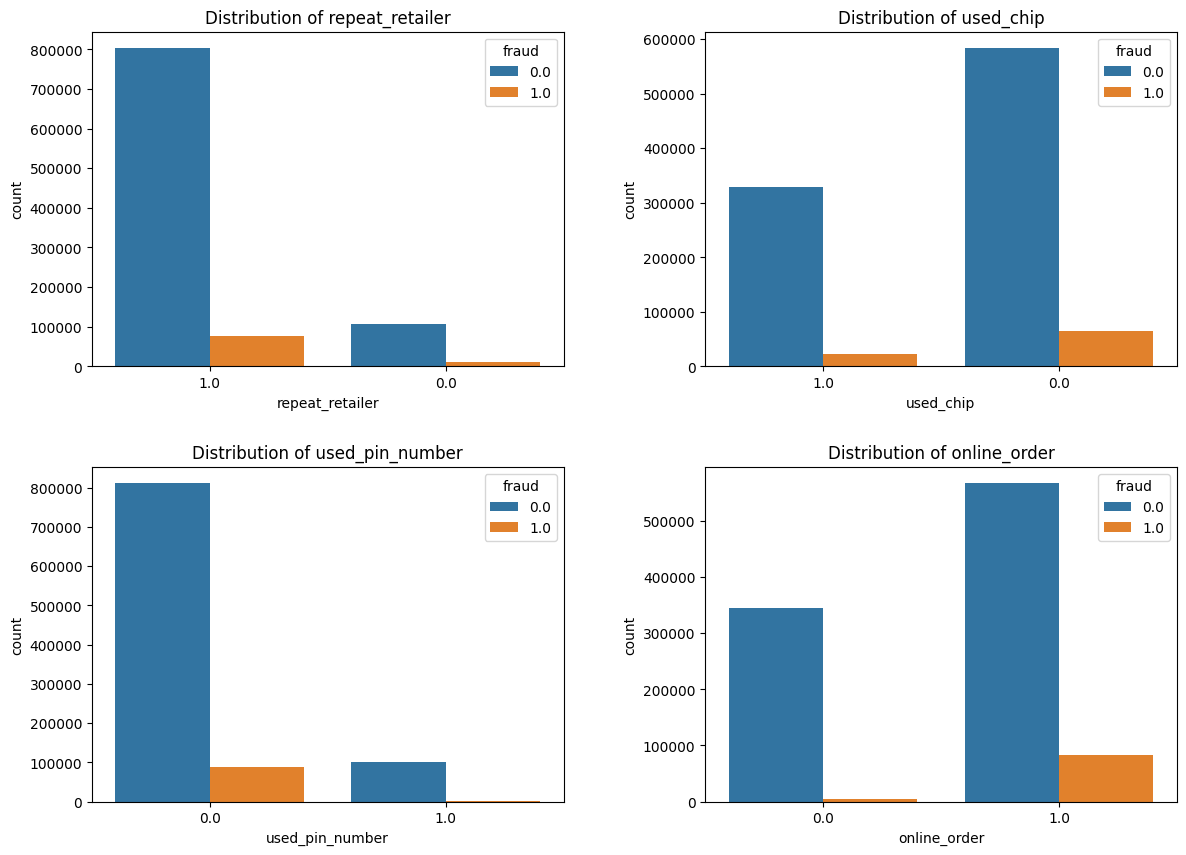

In [14]:
feats_to_plot = df.columns[3:-1]
plt.figure(figsize=(14,10))
for i, col in enumerate(feats_to_plot):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[col].astype(str), hue=df['fraud'])
    plt.title(f'Distribution of {col}')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

### Feature Engineering
- Purpose (make_column_transformer): It ensures only selected columns (typically those containing numerical features) are scaled, leaving other columns untouched or subject to additional transformations if specified elsewhere in the transformer.
- Functionality: StandardScaler() standardizes the features by removing the mean and scaling to unit variance. num_feats should be a list or array of column names or indices containing numerical features.
- Result: When the transformer’s .fit_transform() method is called on a DataFrame, the numerical columns in num_feats will be normalized, and other columns (if not otherwise stated using remainder or other tuples) will be dropped.

In [64]:
# ct = make_column_transformer(
#     (StandardScaler(), num_feats)
# )

# df_scaled = pd.DataFrame(ct.fit_transform(df), columns=num_feats)
# df_cat_feats = df[cat_feats]

# df_concat = pd.concat([df_scaled, df_cat_feats], axis=1)
# df_concat.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.481952,-0.199344,0.046171,1.0,1.0,0.0,0.0,0.0
1,-0.244585,-0.205128,-0.185512,1.0,0.0,0.0,0.0,0.0
2,-0.333207,-0.178261,-0.493548,1.0,0.0,0.0,1.0,0.0
3,-0.377118,0.026365,-0.516674,1.0,1.0,0.0,1.0,0.0
4,0.270592,-0.188447,0.144582,1.0,1.0,0.0,1.0,0.0


- For anomaly detection, we only need genuine class of the data
  - Since we want the model to only learn and fit on normal data, we only use the genuine class. This is to ensure that when an abnormal input is given to the model, its reconstruction error will be higher than that of a normal input. For testing of the model, samples from both the classes will be used.

In [17]:
# X = df_concat.drop(['fraud'], axis=1)
# y = df_concat['fraud']
X = df.drop(['fraud'], axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

# X_train = X_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
#X_train_genuine = X_train[~y_train]

X_train_genuine = X_train[~y_train]
X_test_genuine = X_test[~y_test]

X_train_fraud = X_train[y_train]
X_test_fraud = X_test[y_test]

In [18]:
X_train_genuine.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
501160,11.792468,1.704559,1.332713,1.0,0.0,1.0,0.0
674287,5.050254,8.856755,0.718049,1.0,0.0,1.0,1.0
336329,54.796323,1.124098,1.762978,1.0,1.0,0.0,0.0
831849,25.576202,0.286733,0.235405,1.0,0.0,0.0,1.0
868570,15.002078,2.465263,5.168126,1.0,0.0,0.0,0.0


In [19]:
scaler = MinMaxScaler()
X_train_genuine_scaled = scaler.fit_transform(X_train_genuine)
train_data = torch.tensor(X_train_genuine_scaled, dtype=torch.float32)
X_test_genuine_scaled = scaler.fit_transform(X_test_genuine)
test_data = torch.tensor(X_test_genuine_scaled, dtype=torch.float32)
X_test_fraud_scaled = scaler.fit_transform(X_test_fraud)
test_data_fraud = torch.tensor(X_test_fraud_scaled, dtype=torch.float32)

In [21]:
print(X_train_genuine_scaled)

[[1.34111795e-03 1.43821216e-04 4.95513605e-03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [5.72959580e-04 7.47325854e-04 2.65987963e-03 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [6.24066110e-03 9.48417878e-05 6.56181783e-03 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.99837284e-03 2.34851785e-04 7.25671516e-03 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.13388853e-04 1.33414768e-05 5.49878752e-03 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [9.31299520e-03 6.35209270e-04 8.62152000e-04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


### Preparing the training set and the test set

## Converting the data into Torch tensors
- Converting a NumPy array to a tensor is essential in machine learning workflows because most modern ML frameworks (like TensorFlow and PyTorch) operate natively with tensors, not with NumPy arrays. Tensors enable hardware acceleration (like GPU computation), automatic differentiation, and efficient deployment—all vital for building and training deep learning models.

In [23]:
nb_features = X_train.shape[1]
nb_features

7

In [25]:
X_train_genuine.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
501160,11.792468,1.704559,1.332713,1.0,0.0,1.0,0.0
674287,5.050254,8.856755,0.718049,1.0,0.0,1.0,1.0
336329,54.796323,1.124098,1.762978,1.0,1.0,0.0,0.0
831849,25.576202,0.286733,0.235405,1.0,0.0,0.0,1.0
868570,15.002078,2.465263,5.168126,1.0,0.0,0.0,0.0


In [26]:
train_data = torch.tensor(X_train_genuine.values, dtype=torch.float32)

In [27]:
nb_samples = train_data.shape[0]
nb_samples

730059

## Creating the Architecture of the Neural Network

In [28]:
class SAE(nn.Module):
    def __init__(self, ):
        super(SAE, self).__init__()
        self.fc1 = nn.Linear(nb_features, 64)
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 64)
        self.fc4 = nn.Linear(64, nb_features)
        self.activation = nn.ReLU()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x
sae = SAE()
criterion = nn.MSELoss()
optimizer = optim.Adam(sae.parameters(), lr = 1e-5, weight_decay = 1e-6)

#### About Neural Network Architecture
- Why do we need class: Due to 1. Inheritance, 2. Need multiple variables and methods to make auto encoder.
- We choose Stached Auto Encoder because we have several hidden layer for auto encoder.
- __init__ function is used to initilize the object. We can consider self as auto encoder because it is the object of a SAE class. Blank will conder variable of a Module class because of inheritance.
- Process of inheritance is optimize with super function. We are using super function to use the function and classes of nn.Module. super(SAE, self).__init__() will make sure to get all the functions and classes to parent module.
- Fully Connected Layer
  - We're encoding the input vector into a shorter vector. That's will take place in the first hidden layer.
  - The first input is the number of features in the input vector and features are actually movies contains all the ratings of all the movies, so input features is nb_movies.
  - The first hidden layer of 20 neurons in the autoencoder learns features (e.g., genres like horror) through unsupervised learning, and activated neurons with higher weights help predict user ratings for similar movies.
  - fc1 and fc2 are encoding layer and fc3 and fc4 are decoding layer.
  - An activation function determines whether a neuron activates for an input, such as triggering the horror genre feature when a user gives high ratings to horror movies.
- Forward method
  - The forward function in an autoencoder performs the core action of encoding and decoding observations as they pass through the network.
  - The second function performs encoding, decoding, applies activation functions, and ultimately returns the predicted ratings vector to be compared with the actual ratings vector.
  - The second argument x is the user’s ratings input vector, which is encoded twice and decoded twice to reconstruct the final output vector.
  - The input vector x is passed through the first full connection (fc1) with a sigmoid activation, producing a 20-element encoded vector in the first hidden layer, which then becomes the new x for subsequent transformations.
- Criterion is created as an object of the MSELoss class, representing the mean squared error loss function.
- An optimizer is required, similar to Keras, to apply gradient descent and update weights at each epoch to reduce error.
  - The RMSprop optimizer requires three inputs, the first being all parameters of the autoencoder (including those tied to the Sigmoid activation), which can be accessed directly through the SAE object’s attribute.
  - The second RMSprop input is the learning rate (LR), typically set to 0.01, with decay optionally used to gradually reduce it over epochs for better convergence.

## Training the SAE

In [29]:
batch_size = 32
train_dataset = TensorDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

nb_epoch = 20
for epoch in range(1, nb_epoch + 1):
    sae.train()
    train_loss = 0
    for batch in train_loader:
        # batch is a tuple since TensorDataset returns a tuple; get the tensor:
        input = batch[0]
        target = input.clone()

        optimizer.zero_grad()                 # Important: reset gradients
        output = sae(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        # Accumulate total batch loss
        train_loss += loss.item() * input.size(0)  # Multiply by batch size

    # Average loss over all samples
    avg_loss = train_loss / len(train_loader.dataset)
    print(f'epoch: {epoch} loss: {avg_loss:.4f}')

epoch: 1 loss: 303.7611
epoch: 2 loss: 54.1098
epoch: 3 loss: 11.6790
epoch: 4 loss: 0.3037
epoch: 5 loss: 0.0811
epoch: 6 loss: 0.0562
epoch: 7 loss: 0.0385
epoch: 8 loss: 0.0235
epoch: 9 loss: 0.0095
epoch: 10 loss: 0.0031
epoch: 11 loss: 0.0023
epoch: 12 loss: 0.0016
epoch: 13 loss: 0.0020
epoch: 14 loss: 0.0012
epoch: 15 loss: 0.0021
epoch: 16 loss: 0.0011
epoch: 17 loss: 0.0010
epoch: 18 loss: 0.0012
epoch: 19 loss: 0.0009
epoch: 20 loss: 0.0015


In [34]:
batch_size = 32
train_dataset = TensorDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(test_data)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

best_val_loss = float('inf')
patience = 5
patience_counter = 0

nb_epoch = 20
for epoch in range(1, nb_epoch + 1):
    sae.train()
    train_loss = 0
    for batch in train_loader:
        # batch is a tuple since TensorDataset returns a tuple; get the tensor:
        input = batch[0]
        target = input.clone()

        optimizer.zero_grad()                 # Important: reset gradients
        output = sae(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        # Accumulate total batch loss
        train_loss += loss.item() * input.size(0)  # Multiply by batch size

    # Average loss over all samples
    avg_train_loss = train_loss / len(train_loader.dataset)
    print(f'epoch: {epoch} loss: {avg_train_loss:.4f}')

    # --- Compute validation loss ---
    sae.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:   # Assume val_loader is set up like train_loader
            input = batch[0]
            target = input.clone()
            output = sae(input)
            loss = criterion(output, target)
            val_loss += loss.item() * input.size(0)
    avg_val_loss = val_loss / len(val_loader.dataset)

    print(f'Epoch {epoch}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

    # --- Model checkpoint ---
    if avg_val_loss < best_val_loss:
        print("Validation loss improved. Saving checkpoint.")
        torch.save(sae.state_dict(), "anomaly_detection_checkpoint.pth")
        best_val_loss = avg_val_loss
        wait = 0
    else:
        wait += 1

    # --- Early stopping ---
    if wait >= patience:
        print(f"Early stopping on epoch {epoch} (no improvement for {patience} epochs).")
        break

epoch: 1 loss: 0.0007
Epoch 1, Train Loss: 0.0007, Val Loss: 0.0329
Validation loss improved. Saving checkpoint.
epoch: 2 loss: 0.0007
Epoch 2, Train Loss: 0.0007, Val Loss: 0.0320
Validation loss improved. Saving checkpoint.
epoch: 3 loss: 0.0007
Epoch 3, Train Loss: 0.0007, Val Loss: 0.0312
Validation loss improved. Saving checkpoint.
epoch: 4 loss: 0.0005
Epoch 4, Train Loss: 0.0005, Val Loss: 0.0304
Validation loss improved. Saving checkpoint.
epoch: 5 loss: 0.0005
Epoch 5, Train Loss: 0.0005, Val Loss: 0.0295
Validation loss improved. Saving checkpoint.
epoch: 6 loss: 0.0007
Epoch 6, Train Loss: 0.0007, Val Loss: 0.0287
Validation loss improved. Saving checkpoint.
epoch: 7 loss: 0.0006
Epoch 7, Train Loss: 0.0006, Val Loss: 0.0279
Validation loss improved. Saving checkpoint.
epoch: 8 loss: 0.0005
Epoch 8, Train Loss: 0.0005, Val Loss: 0.0273
Validation loss improved. Saving checkpoint.
epoch: 9 loss: 0.0006
Epoch 9, Train Loss: 0.0006, Val Loss: 0.0267
Validation loss improved. Sa

In [ ]:
# nb_epoch = 200
# for epoch in range(1, nb_epoch + 1):
#     train_loss = 0
#     s = 0.
#     for idx in range(nb_samples):
#         input = Variable(train_data[idx]).unsqueeze(0)
#         target = input.clone()
#         output = sae(input)
#         target.requires_grad = False
#         # output[target == 0] = 0      # Usually skip for tabular data
#         loss = criterion(output, target)
#         mean_corrector = nb_features / float(torch.sum(target.data > 0) + 1e-10)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         train_loss += np.sqrt(loss.item() * mean_corrector)
#         s += 1.
#         optimizer.step()
#     print(f'epoch: {epoch} loss: {train_loss / s}')

- About Training the SAE
  - s: Variable that will count the number of users that rated at least one movie. s is float because we are going to compute root mean square error at the end.
  - input: Since training_set_id_user is a 1D vector, it must be converted into a batch of input vectors (e.g., using Variable and reshaping) because PyTorch networks like the forward function cannot process single 1D vectors directly. In PyTorch, to create a batch of one input vector for online learning, wrap training_set(id_user) in a Variable, then use .unsqueeze(0) to add a new dimension at index 0, enabling weight updates after each observation.
  - Target is same as input vector but since we are modifying input.
  - Only purpose of introducing if condition is to optimize memory (Remove user if not rated any movie). target.data get all the rating of id_user.
  - output: A vector of predicted rating. sea object with input call forward method and return predicted rating.
  - target.require_grad: Optimization step, since we have 2 input and no need to compute gradient.
  - output(target == 0): Optimization step, where we do not want to include rating if user has not rated.
  - Criterion object is used to calculate loss.
  - The mean_corrector variable (Represents the average of the error by considering the movies that were rated) is defined as the total number of movies divided by the number of movies with non-zero ratings (with a small value added to avoid division by zero), and it ensures error averaging is computed only over rated movies, making the mean mathematically relevant.
  - Calling loss.backward() computes the gradients, indicating whether each weight should increase or decrease to minimize the loss.
  - To compute RMSE, the train loss is updated incrementally by adding the error (difference between real and predicted ratings) adjusted with the mean_corrector, and then NumPy’s square root is applied to convert the squared error into root mean squared error.
  - The optimizer’s step() method updates the weights, where backward() determines the direction of weight change, and the optimizer step decides the intensity (magnitude) of the update.

## Testing the SAE

In [30]:
# test_loss = 0
# s = 0.
# for id_user in range(nb_users):
#     input = Variable(training_set[id_user]).unsqueeze(0)
#     target = Variable(test_set[id_user]).unsqueeze(0)
#     if torch.sum(target.data > 0) > 0:
#         output = sae(input)
#         target.require_grad = False
#         output[target == 0] = 0
#         loss = criterion(output, target)
#         mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
#         test_loss += np.sqrt(loss.data*mean_corrector)
#         s += 1.
# print('test loss: '+str(test_loss/s))

# Assume test_data is your scaled tensor (N_samples, nb_features)
batch_size = 32
test_dataset = TensorDataset(test_data)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

sae.eval()  # Set model to evaluation mode
test_loss = 0

with torch.no_grad():
    for batch in test_loader:
        input = batch[0]
        target = input.clone()
        output = sae(input)
        loss = criterion(output, target)
        test_loss += loss.item() * input.size(0)   # Multiply to sum total samples

avg_test_loss = test_loss / len(test_loader.dataset)
print(f'test loss: {avg_test_loss:.4f}')


test loss: 0.0365


- If a user rates all action movies highly, the action-related feature neurons activate with strong weights to predict high ratings for unseen action movies, and these predictions are then compared with the test set ratings.

In [31]:
# test_data_fraud
# test_loss = 0
# s = 0.
# for id_user in range(nb_users):
#     input = Variable(training_set[id_user]).unsqueeze(0)
#     target = Variable(test_set[id_user]).unsqueeze(0)
#     if torch.sum(target.data > 0) > 0:
#         output = sae(input)
#         target.require_grad = False
#         output[target == 0] = 0
#         loss = criterion(output, target)
#         mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
#         test_loss += np.sqrt(loss.data*mean_corrector)
#         s += 1.
# print('test loss: '+str(test_loss/s))

# Assume test_data is your scaled tensor (N_samples, nb_features)
batch_size = 32
test_data_fraud = TensorDataset(test_data_fraud)
test_data_fraud_loader = DataLoader(test_data_fraud, batch_size=batch_size, shuffle=False)

sae.eval()  # Set model to evaluation mode
test_loss = 0

with torch.no_grad():
    for batch in test_data_fraud_loader:
        input = batch[0]
        target = input.clone()
        output = sae(input)
        loss = criterion(output, target)
        test_loss += loss.item() * input.size(0)   # Multiply to sum total samples

avg_test_loss = test_loss / len(test_loader.dataset)
print(f'test loss: {avg_test_loss:.4f}')


test loss: 0.0037


### Results

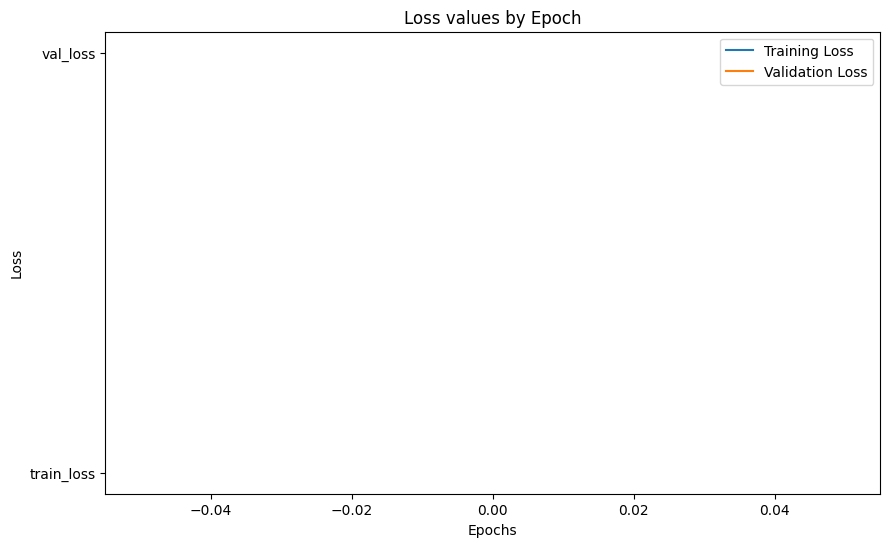

In [36]:
plt.figure(figsize=(10,6))
plt.plot('train_loss', label="Training Loss")
plt.plot('val_loss', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss values by Epoch")
plt.show()